In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib
from itertools import product
import numpy as np

from networkx.drawing.nx_agraph import graphviz_layout

# %pylab inline

# Test NetworkX Library

/home/william/anaconda3/envs/hammersack/lib/python3.7/site-packages/pygraphviz/agraph.py:1367: RuntimeWarning: Warning: r is not a known color.

  warnings.warn(b"".join(errors).decode(self.encoding), RuntimeWarning)


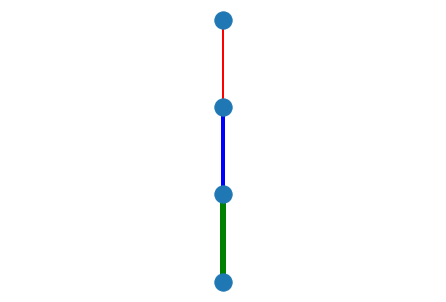

In [2]:
G = nx.Graph()
G.add_edge(1,2,color='r',weight=2)
G.add_edge(2,3,color='b',weight=4)
G.add_edge(3,4,color='g',weight=6)

pos = nx.drawing.nx_agraph.graphviz_layout(G, prog='dot')

edges = G.edges()
colors = [G[u][v]['color'] for u,v in edges]
weights = [G[u][v]['weight'] for u,v in edges]

nx.draw(G, pos, edges=edges, edge_color=colors, width=weights)

In [3]:
#https://stackoverflow.com/questions/29586520/can-one-get-hierarchical-graphs-from-networkx-with-python-3

def hierarchy_pos(G, root=None, width=1., vert_gap = 0.2, vert_loc = 0, xcenter = 0.5):

    '''
    From Joel's answer at https://stackoverflow.com/a/29597209/2966723.  
    Licensed under Creative Commons Attribution-Share Alike 

    If the graph is a tree this will return the positions to plot this in a 
    hierarchical layout.

    G: the graph (must be a tree)

    root: the root node of current branch 
    - if the tree is directed and this is not given, 
      the root will be found and used
    - if the tree is directed and this is given, then 
      the positions will be just for the descendants of this node.
    - if the tree is undirected and not given, 
      then a random choice will be used.

    width: horizontal space allocated for this branch - avoids overlap with other branches

    vert_gap: gap between levels of hierarchy

    vert_loc: vertical location of root

    xcenter: horizontal location of root
    '''
    if not nx.is_tree(G):
        raise TypeError('cannot use hierarchy_pos on a graph that is not a tree')

    if root is None:
        if isinstance(G, nx.DiGraph):
            root = next(iter(nx.topological_sort(G)))  #allows back compatibility with nx version 1.11
        else:
            root = random.choice(list(G.nodes))

    def _hierarchy_pos(G, root, width=1., vert_gap = 0.2, vert_loc = 0, xcenter = 0.5, pos = None, parent = None):
        '''
        see hierarchy_pos docstring for most arguments

        pos: a dict saying where all nodes go if they have been assigned
        parent: parent of this branch. - only affects it if non-directed

        '''

        if pos is None:
            pos = {root:(xcenter,vert_loc)}
        else:
            pos[root] = (xcenter, vert_loc)
        children = list(G.neighbors(root))
        if not isinstance(G, nx.DiGraph) and parent is not None:
            children.remove(parent)  
        if len(children)!=0:
            dx = width/len(children) 
            nextx = xcenter - width/2 - dx/2
            for child in children:
                nextx += dx
                pos = _hierarchy_pos(G,child, width = dx, vert_gap = vert_gap, 
                                    vert_loc = vert_loc-vert_gap, xcenter=nextx,
                                    pos=pos, parent = root)
        return pos


    return _hierarchy_pos(G, root, width, vert_gap, vert_loc, xcenter)

In [4]:

G = nx.DiGraph()

G.add_node("ROOT")

for i in range(10):
    G.add_node("Child_%i" % i)
    G.add_node("Grandchild_%i" % i)
    G.add_node("Greatgrandchild_%i" % i)

    G.add_edge("ROOT", "Child_%i" % i, color='r', weight=2)
    G.add_edge("Child_%i" % i, "Grandchild_%i" % i, color='b', weight=4)
    G.add_edge("Grandchild_%i" % i, "Greatgrandchild_%i" % i, color='g', weight=6)

# write dot file to use with graphviz
# run "dot -Tpng test.dot >test.png"
# write_dot(G,'test.dot')

# same layout using matplotlib with no labels
# plt.title('draw_networkx')
# pos =graphviz_layout(G, prog='dot')
# nx.draw(G, pos, with_labels=False, arrows=True)
# plt.savefig('nx_test.png')

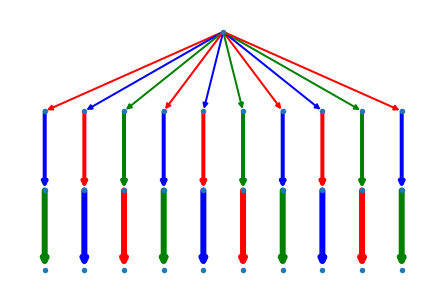

In [5]:
pos = hierarchy_pos(G,"ROOT")  

edges = G.edges()
#colors = [G[u][v]['color'] for u,v in edges]
weights = [G[u][v]['weight'] for u,v in edges]

nx.draw(G, pos, edges=edges, edge_color=colors, width=weights, node_size=20)
# nx.draw(G, pos=pos, with_labels=False)

# Load Conductance Measures

In [2]:
val_attrib_conv1 = np.load('./zf_net_conductance/val_attrib_conv1_.npy')
val_attrib_conv2 = np.load('./zf_net_conductance/val_attrib_conv2_.npy')
val_attrib_conv3 = np.load('./zf_net_conductance/val_attrib_conv3_.npy')
val_attrib_conv4 = np.load('./zf_net_conductance/val_attrib_conv4_.npy')

val_labels_conv1 = np.load('./zf_net_conductance/val_labels_conv1_.npy')
val_labels_conv2 = np.load('./zf_net_conductance/val_labels_conv2_.npy')
val_labels_conv3 = np.load('./zf_net_conductance/val_labels_conv3_.npy')
val_labels_conv4 = np.load('./zf_net_conductance/val_labels_conv4_.npy')

In [3]:
# average attrib measures over images
    
conv1_frogs = np.mean(val_attrib_conv1[val_labels_conv1==0].astype(np.float64), axis=0)
conv1_frogs = conv1_frogs - (conv1_frogs.min())

conv2_frogs = np.mean(val_attrib_conv2[val_labels_conv2==0].astype(np.float64), axis=0)
conv2_frogs = conv2_frogs - (conv2_frogs.min())

conv3_frogs = np.mean(val_attrib_conv3[val_labels_conv3==0].astype(np.float64), axis=0)
conv3_frogs = conv3_frogs - (conv3_frogs.min())

conv4_frogs = np.mean(val_attrib_conv4[val_labels_conv4==0].astype(np.float64), axis=0)
conv4_frogs = conv4_frogs - (conv4_frogs.min())

conv1_horse = np.mean(val_attrib_conv1[val_labels_conv1==1].astype(np.float64), axis=0)
conv2_horse = np.mean(val_attrib_conv2[val_labels_conv2==1].astype(np.float64), axis=0)
conv3_horse = np.mean(val_attrib_conv3[val_labels_conv3==1].astype(np.float64), axis=0)
conv4_horse = np.mean(val_attrib_conv4[val_labels_conv4==1].astype(np.float64), axis=0)

In [4]:
conv1_frogs_mean = np.mean(val_attrib_conv1[val_labels_conv1 == 0].astype(np.float64), axis=0)
conv1_frogs_mean =  1 / (conv1_frogs_mean - (conv1_frogs_mean.min() - 1))

conv2_frogs_mean = np.mean(val_attrib_conv2[val_labels_conv2 == 0].astype(np.float64), axis=0)
conv2_frogs_mean =  1 / (conv2_frogs_mean - (conv2_frogs_mean.min() - 1))

conv3_frogs_mean = np.mean(val_attrib_conv3[val_labels_conv3 == 0].astype(np.float64), axis=0)
conv3_frogs_mean =  1 / (conv3_frogs_mean - (conv3_frogs_mean.min() - 1))

conv4_frogs_mean = np.mean(val_attrib_conv4[val_labels_conv4 == 0].astype(np.float64), axis=0)
conv4_frogs_mean =  1 / (conv4_frogs_mean - (conv4_frogs_mean.min() - 1))

In [13]:
conv1_frogs.shape[0] * conv2_frogs.shape[0] * conv3_frogs.shape[0]* conv4_frogs.shape[0]

3623878656

# Plot Attribution Paths

In [136]:
G = nx.DiGraph()

G.add_node("l0_0")
G.add_node("ln_0")

for i, l1_e in enumerate(conv1_frogs_mean[:50]):
    i_ = str(i) + "l1"
    G.add_node(i_)
    G.add_edge("l0_0", i_, weight=0.01)
    
    for j, l2_e in enumerate(conv2_frogs_mean[:50]):
        
        j_ = str(j) + "l2"
        path_mag = l1_e

        if (i==0):
            G.add_node(j_)
        
        G.add_edge(i_, j_, weight=path_mag)
                                   
        for k, l3_e in enumerate(conv3_frogs_mean[:50]):
        
            k_ = str(k) + "l3"
            path_mag = l2_e

            if (j==0):
                G.add_node(k_)
            
            G.add_edge(j_, k_, weight=path_mag)
        
            for l, l4_e in enumerate(conv4_frogs_mean[:50]):

                l_ = str(l) + "l4"
                path_mag = l3_e

                if (k==0):
                    G.add_node(l_)
                    G.add_edge(l_, "ln_n", weight=l4_e)

                G.add_edge(k_, l_, weight=path_mag)

In [137]:
d = nx.dijkstra_path(G, 'l0_0', 'ln_0')

K = nx.shortest_simple_paths(G, 'l0_0', 'ln_0', 'weight')

In [138]:
d

['ROOT', '42l1', '39l2', '45l3', '21l4', 'FOOT']

In [139]:
n_shortest_paths = []
n = 5

for counter, path in enumerate(K):
    if counter > n:
        break
    n_shortest_paths.append(path)

In [140]:
n_shortest_paths

[['ROOT', '42l1', '39l2', '45l3', '21l4', 'FOOT'],
 ['ROOT', '42l1', '31l2', '45l3', '21l4', 'FOOT'],
 ['ROOT', '42l1', '19l2', '45l3', '21l4', 'FOOT'],
 ['ROOT', '42l1', '11l2', '45l3', '21l4', 'FOOT'],
 ['ROOT', '27l1', '39l2', '45l3', '21l4', 'FOOT'],
 ['ROOT', '42l1', '14l2', '45l3', '21l4', 'FOOT']]

In [7]:
def scale(vector, min=1, max=2):
    if (vector.max() - vector.min()) == 0:
        return vector
    return (max - min)*((vector - vector.min()) / (vector.max() - vector.min())) + min

In [10]:
G = nx.DiGraph()

G.add_node("l0_0", weight=30)
G.add_node("ln_0", weight=30)

edge_weight = 0.1

for i, i_mag in enumerate(conv1_frogs[:50]):
    i_name = f'l1_{i}'
    G.add_node(i_name, weight=i_mag)
    G.add_edge("l0_0", i_name, weight=edge_weight)
    
    for j, j_mag in enumerate(conv2_frogs[:50]):
        
        j_name = f'l2_{j}'
        path_mag = edge_weight

        if (i==0):
            G.add_node(j_name, weight=j_mag)
        
        G.add_edge(i_name, j_name, weight=path_mag)
                                   
        for k, k_mag in enumerate(conv3_frogs[:50]):
        
            k_name = f'l3_{k}'
            path_mag = edge_weight

            if (j==0):
                G.add_node(k_name, weight=k_mag)
            
            G.add_edge(j_name, k_name, weight=path_mag)
        
            for l, l_mag in enumerate(conv4_frogs[:50]):

                l_name = f'l4_{l}'
                path_mag = edge_weight

                if (k==0):
                    G.add_node(l_name, weight=l_mag)
                    G.add_edge(l_name, "ln_0", weight=edge_weight)

                G.add_edge(k_name, l_name, weight=path_mag)

In [143]:
# all_weights = {}
# n_layers = 5
# for layer_ix in range(n_layers):
#     layer_name = f'l{layer_ix}'
#     layer_weights = {}
#     for node1, node2 in edges:
#         if layer_name not in node1:
#             continue
#         edge_name = f'{node1}_{node2}'
#         try:
#             weight = G[node1][node2]['weight']
#         except KeyError:
#             weight = None
#         layer_weights[edge_name] = weight
#     all_weights[layer_name] = layer_weights
    
# print(all_weights)


# weights = {}
# for layer, layer_edges in all_weights.items():
#     edge_names = []
#     layer_edge_vals = []
#     for node1_node2, edge_value in layer_edges.items():
#         edge_names.append(node1_node2)
#         layer_edge_vals.append(edge_value)
#     layer_edge_vals = np.array(layer_edge_vals)
#     try:
#         layer_edge_vals[layer_edge_vals == None] = np.min(layer_edge_vals[layer_edge_vals != None])
#     except ValueError:
#         layer_edge_vals[layer_edge_vals == None] = 0.
#     layer_edge_vals = scale(layer_edge_vals, 0, 100)
    
#     for e, v in zip(edge_names, layer_edge_vals):
#         node1, node2 = e.split('_')
#         try:
#             weights[node1][node2] = v
#         except KeyError:
#             weights[node1] = {node2: v}

In [1]:
from networkx import drawing as nx_draw

nodes = []
node_layers = []
node_weights = []
for n, data in G.nodes(data=True):
    nodes.append(n)
    node_layers.append(n.split('_')[0])
    node_weights.append(data['weight'])
    
nodes, node_layers, node_weights = map(np.array, [nodes, node_layers, node_weights])
    
edges = []
edge_weights = []
for n1, n2, data in G.edges(data=True):
    edges.append(f'{n1}-{n2}')
    edge_weights.append(data['weight'])
    
edges, edge_weights = map(np.array, [edges, edge_weights])

unq_layers, inv = np.unique(node_layers, return_inverse=True)
min_node_size = 1
max_node_size = 500
for l in range(len(unq_layers)):
    try:
        scaled_node_weights = scale(node_weights[l == inv], min=min_node_size, max=max_node_size)
        node_weights[l == inv] = scale(node_weights[l == inv], min=min_node_size, max=max_node_size)
    except ValueError:
        node_weights[l == inv] = min_node_size

plt.figure(figsize=(20, 20))

pos = graphviz_layout(G, prog='dot', root='l0')
# pos = nx_draw.spectral_layout(G)
nx.draw(G, pos, edges=edges, width=edge_weights, with_labels=False, arrows=True, node_size=node_weights)

NameError: name 'G' is not defined

In [22]:
np.min(conv4_frogs[:12]), np.max(conv4_frogs[:12])

(0.004067400693893433, 0.008530321598052979)

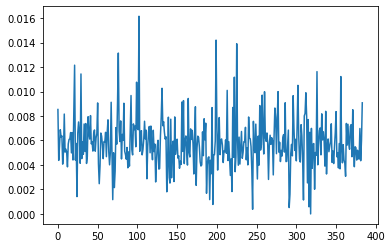

In [148]:
plt.plot(conv4_frogs)

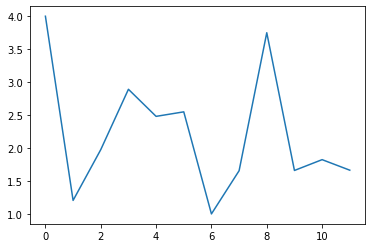

In [24]:
plt.plot((3*(conv4_frogs[:12] - conv4_frogs[:12].min()) / (conv4_frogs[:12].max() - conv4_frogs[:12].min()))+1)

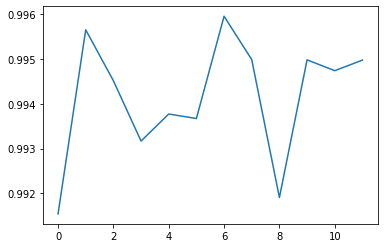

In [25]:
plt.plot(conv4_frogs_mean[:12])

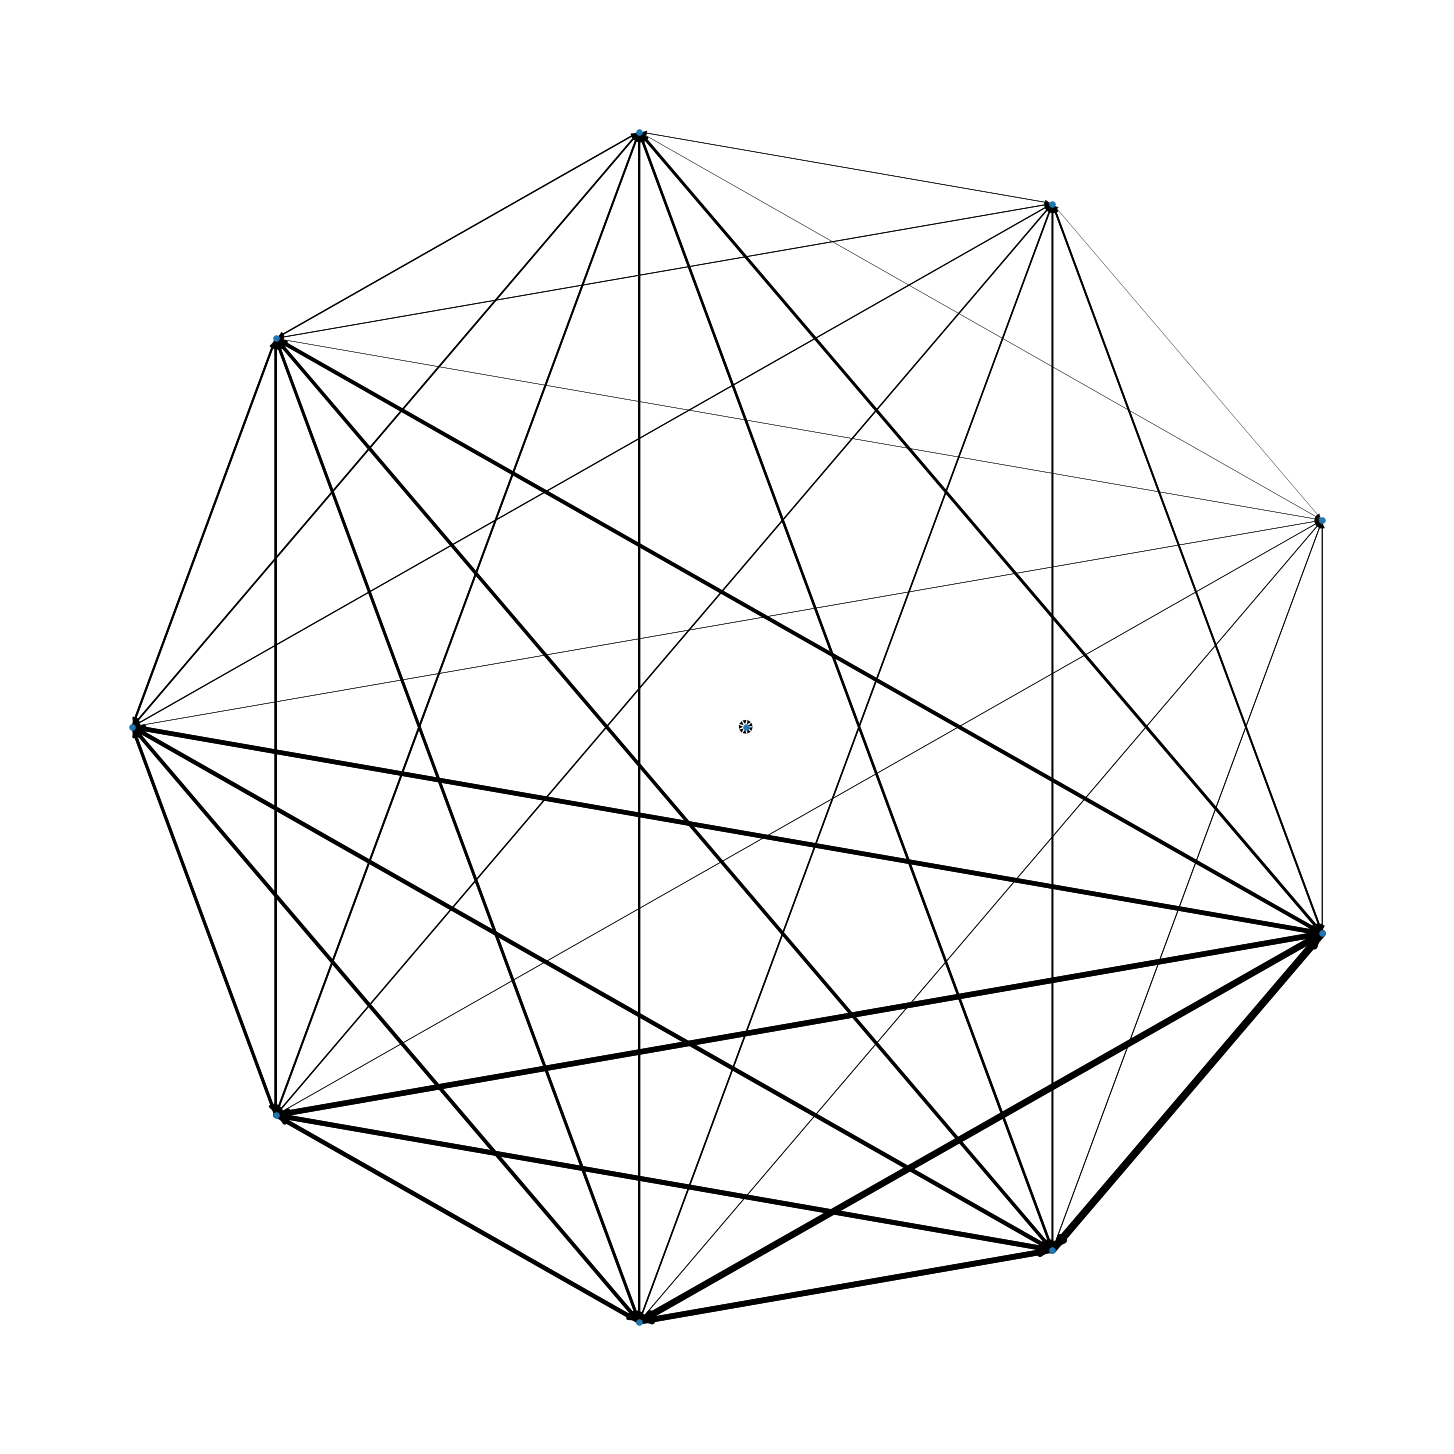

In [30]:
import networkx as nx

G = nx.DiGraph()
edges = G.edges()

for i in range(10):
    G.add_node(i)
    for j in range(10):
        if i == 0:
            G.add_node(j)
        G.add_edge(i, j, weight=i*j*0.1)
        
    
weights = [G[u][v]['weight'] for u,v in edges]

plt.figure(figsize=(20,20))

pos = graphviz_layout(G, prog='twopi')
nx.draw(G, pos, edges=edges, width=weights, with_labels=False, arrows=True, node_size=30)